In [24]:
import pandas as pd
import numpy as np

## load dataset

In [25]:
df = pd.read_csv('dtmhs.csv')
df.sample()

,JK,Usia_Tahun,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPK_Lulus,Status_Kelulusan
49,L,>25,B,B,B,B,B,B,B,Telat


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   JK                100 non-null    object
 1   Usia_Tahun        100 non-null    object
 2   IPS1              100 non-null    object
 3   IPS2              100 non-null    object
 4   IPS3              100 non-null    object
 5   IPS4              100 non-null    object
 6   IPS5              100 non-null    object
 7   IPS6              100 non-null    object
 8   IPK_Lulus         100 non-null    object
 9   Status_Kelulusan  100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [27]:
df['Status_Kelulusan'].value_counts()

Status_Kelulusan
Telat    61
Tepat    39
Name: count, dtype: int64

In [28]:
ind_col = [col for col in df.columns if col != 'Status_Kelulusan']
dep_col = 'Status_Kelulusan'

print(ind_col)

['JK', 'Usia_Tahun', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPS6', 'IPK_Lulus']


In [29]:
df[dep_col].value_counts()

Status_Kelulusan
Telat    61
Tepat    39
Name: count, dtype: int64

## Transformasi Dataset

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df:
    df[col] = le.fit_transform(df[col])

In [31]:
df['Status_Kelulusan'] = le.fit_transform(df['Status_Kelulusan'])

In [32]:
x = df[ind_col] #Feature
y = df[dep_col] #Label

In [33]:
df.head()

,JK,Usia_Tahun,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPK_Lulus,Status_Kelulusan
0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,1,1,0,0,0,0,0,0
4,1,0,1,1,1,1,1,1,0,0


In [34]:
df.to_csv('kelulusan_mahasiswa.csv',index=False)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

df

,JK,Usia_Tahun,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPK_Lulus,Status_Kelulusan
0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,1,1,0,0,0,0,0,0
4,1,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0,0,0,0,0
96,0,1,0,1,1,1,1,1,1,0
97,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0


## Membuat Model Decision Tree

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1, 
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42,splitter='best'
)

model = dtc.fit(x_train,y_train)

dtc_acc = accuracy_score(y_test,dtc.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train,dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

print(f"Confusion Matrix : \n {confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test,dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Classification Report : \n {classification_report(y_test,dtc.predict(x_test))}")

Akurasi Data Training = 0.6875
Akurasi Data Testing = 0.55 

Confusion Matrix : 
 [[10  0]
 [ 9  1]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       1.00      0.10      0.18        10

    accuracy                           0.55        20
   macro avg       0.76      0.55      0.44        20
weighted avg       0.76      0.55      0.44        20



## Simulasi Model

In [37]:
input_data = (0,1,0,0,0,0,0,0,0)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ("Mahasiswa Lulus dengan Tepat Waktu")
else:
    print ("Mahasiswa Lulus Telat")


[1]
Mahasiswa Lulus Telat


C:\Users\rifqi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisasi Decision Tree

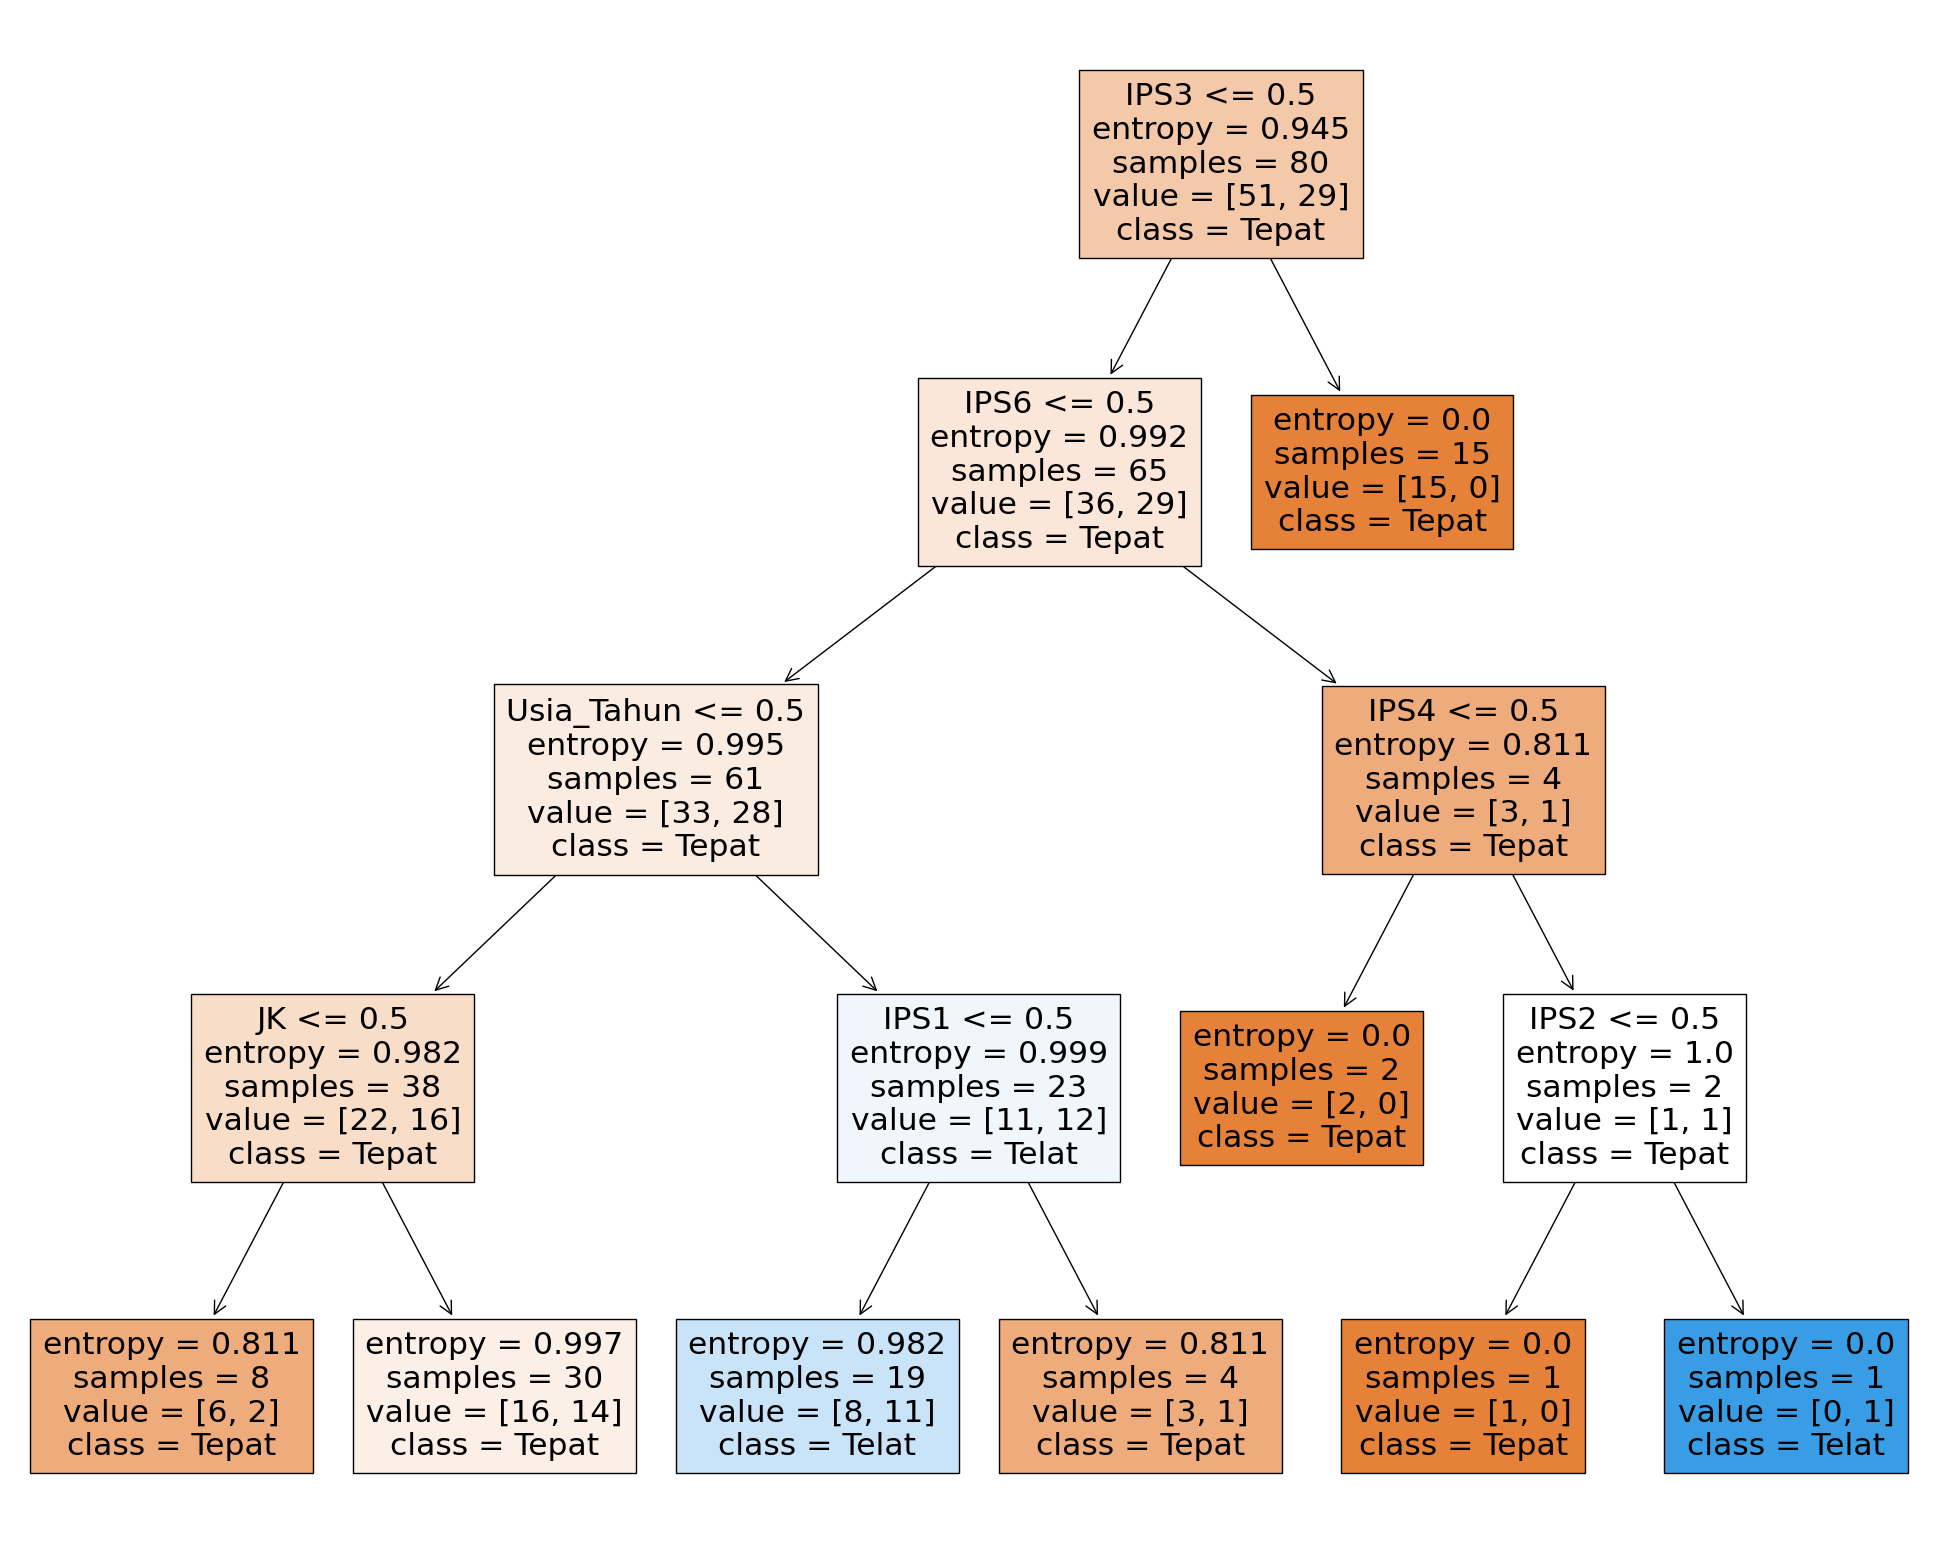

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names = ind_col,
                   class_names = ['Tepat','Telat'],
                   filled = True)